# Exploratory Data Analysis on MTSamples Dataset

In [4]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from wordcloud import STOPWORDS
from collections import Counter
import warnings
warnings.filterwarnings('ignore')
from tqdm.notebook import tqdm
tqdm.pandas()

In [5]:
# Download necessary NLTK data
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\PARTHA\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [50]:
# Load dataset
df = pd.read_csv("mtsamples.csv")

In [51]:
df.shape

(4999, 6)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4999 entries, 0 to 4998
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         4999 non-null   int64 
 1   description        4999 non-null   object
 2   medical_specialty  4999 non-null   object
 3   sample_name        4999 non-null   object
 4   transcription      4966 non-null   object
 5   keywords           3931 non-null   object
dtypes: int64(1), object(5)
memory usage: 234.5+ KB


In [53]:
df.head()

Unnamed: 0                                        description  \
0           0   A 23-year-old white female presents with comp...   
1           1           Consult for laparoscopic gastric bypass.   
2           2           Consult for laparoscopic gastric bypass.   
3           3                             2-D M-Mode. Doppler.     
4           4                                 2-D Echocardiogram   

             medical_specialty                                sample_name  \
0         Allergy / Immunology                         Allergic Rhinitis    
1                   Bariatrics   Laparoscopic Gastric Bypass Consult - 2    
2                   Bariatrics   Laparoscopic Gastric Bypass Consult - 1    
3   Cardiovascular / Pulmonary                    2-D Echocardiogram - 1    
4   Cardiovascular / Pulmonary                    2-D Echocardiogram - 2    

                                       transcription  \
0  SUBJECTIVE:,  This 23-year-old white female pr...   
1  PAST MEDICAL HISTORY:, He has difficulty climb...   
2  HISTORY OF PRESENT ILLNESS: , I have seen ABC ...   
3  2-D M-MODE: , ,1.  Left atrial enlargement wit...   
4  1.  The left ventricular cavity size and wall ...   

                                            keywords  
0  allergy / immunology, allergic rhinitis, aller...  
1  bariatrics, laparoscopic gastric bypass, weigh...  
2  bariatrics, laparoscopic gastric bypass, heart...  
3  cardiovascular / pulmonary, 2-d m-mode, dopple...  
4  cardiovascular / pulmonary, 2-d, doppler, echo...

In [54]:
# Drop unnecessary column
df.drop(columns=["Unnamed: 0"], inplace=True)

In [55]:
# Summarize missing values
missing_values = df.isnull().sum()
missing_values

description             0
medical_specialty       0
sample_name             0
transcription          33
keywords             1068
dtype: int64

In [56]:
df.dropna(subset=['transcription'], inplace=True)

In [58]:
# Descriptive statistics for text length metrics
df["description_length"] = df["description"].apply(lambda x: len(str(x).split()))
df["transcription_length"] = df["transcription"].apply(lambda x: len(str(x).split()))
df["keywords_count"] = df["keywords"].apply(lambda x: len(str(x).split(',')) if pd.notnull(x) else 0)

# Descriptive statistics for computed columns
desc_stats = df[["description_length", "transcription_length", "keywords_count"]].describe()
desc_stats

description_length  transcription_length  keywords_count
count         4966.000000           4966.000000     4966.000000
mean            18.545711            465.448852       10.846154
std             11.978355            316.386344        7.557187
min              0.000000              1.000000        0.000000
25%              9.000000            241.000000        6.000000
50%             16.000000            398.000000       11.000000
75%             25.750000            615.000000       16.000000
max             76.000000           3029.000000       36.000000

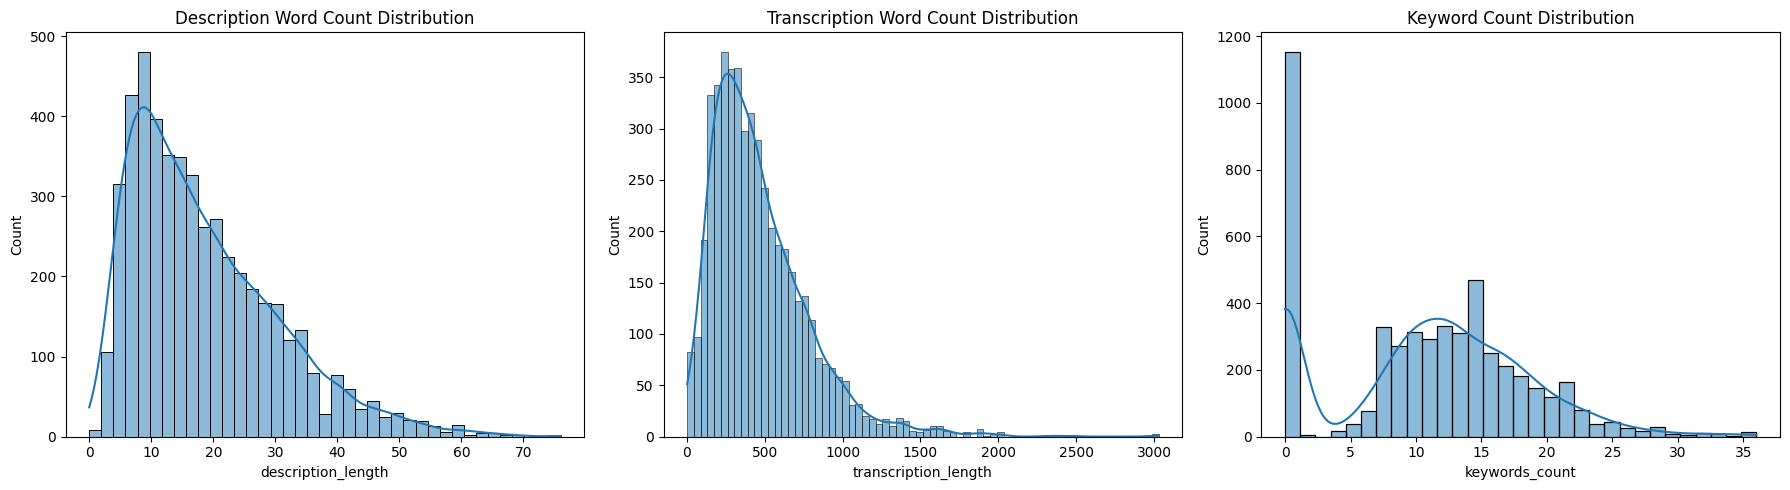

In [59]:
import seaborn as sns
fig, axs = plt.subplots(1, 3, figsize=(18, 5))
sns.histplot(df["description_length"], kde=True, ax=axs[0])
axs[0].set_title("Description Word Count Distribution")
sns.histplot(df["transcription_length"], kde=True, ax=axs[1])
axs[1].set_title("Transcription Word Count Distribution")
sns.histplot(df["keywords_count"], kde=True, ax=axs[2])
axs[2].set_title("Keyword Count Distribution")
plt.tight_layout()

In [60]:
# Derive columns
df['transcription'] = df['transcription'].astype(str)
df['word_count'] = df['transcription'].progress_apply(lambda x: len(word_tokenize(x)))
df['char_count'] = df['transcription'].progress_apply(len)
df['sentence_count'] = df['transcription'].progress_apply(lambda x: len(sent_tokenize(x)))
df['words_per_sentence'] = df['word_count'] / df['sentence_count']

  0%|          | 0/4966 [00:00<?, ?it/s]

  0%|          | 0/4966 [00:00<?, ?it/s]

  0%|          | 0/4966 [00:00<?, ?it/s]

In [61]:
# Basic Distributions
## Word Count Distribution
fig1 = px.histogram(df, x='word_count', nbins=100, title='Distribution of Word Counts in Transcriptions')
fig1.update_layout(bargap=0.1)
fig1.show()

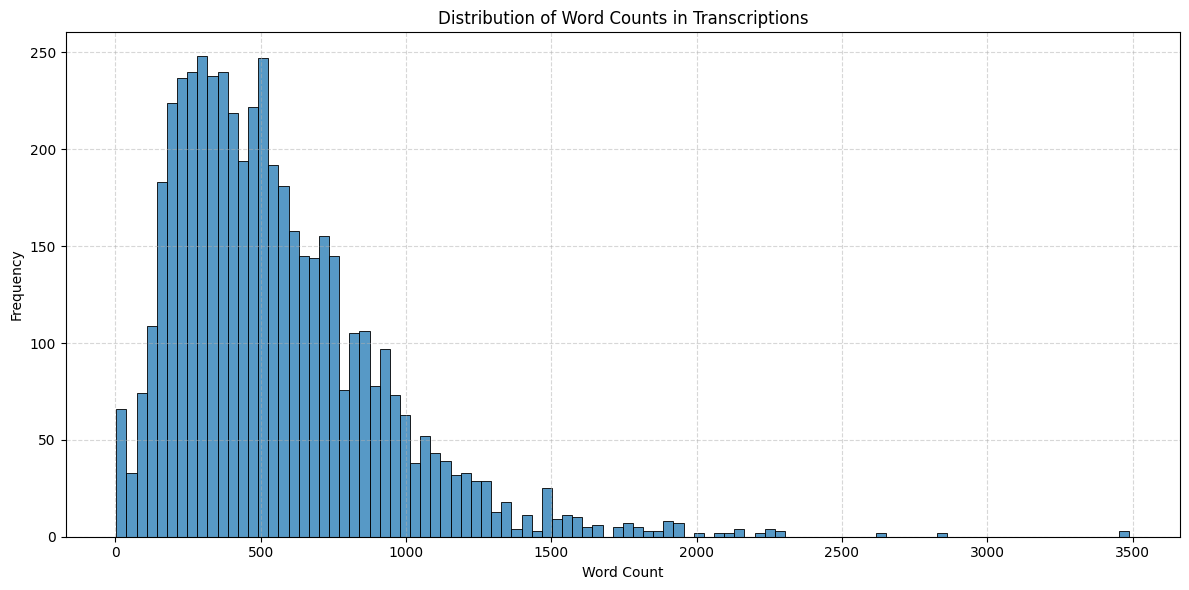

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.histplot(df['word_count'], bins=100, kde=False)
plt.title('Distribution of Word Counts in Transcriptions')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [62]:
## Sentence Count Distribution
fig2 = px.histogram(df, x='sentence_count', nbins=50, title='Distribution of Sentence Counts in Transcriptions')
fig2.update_layout(bargap=0.1)
fig2.show()

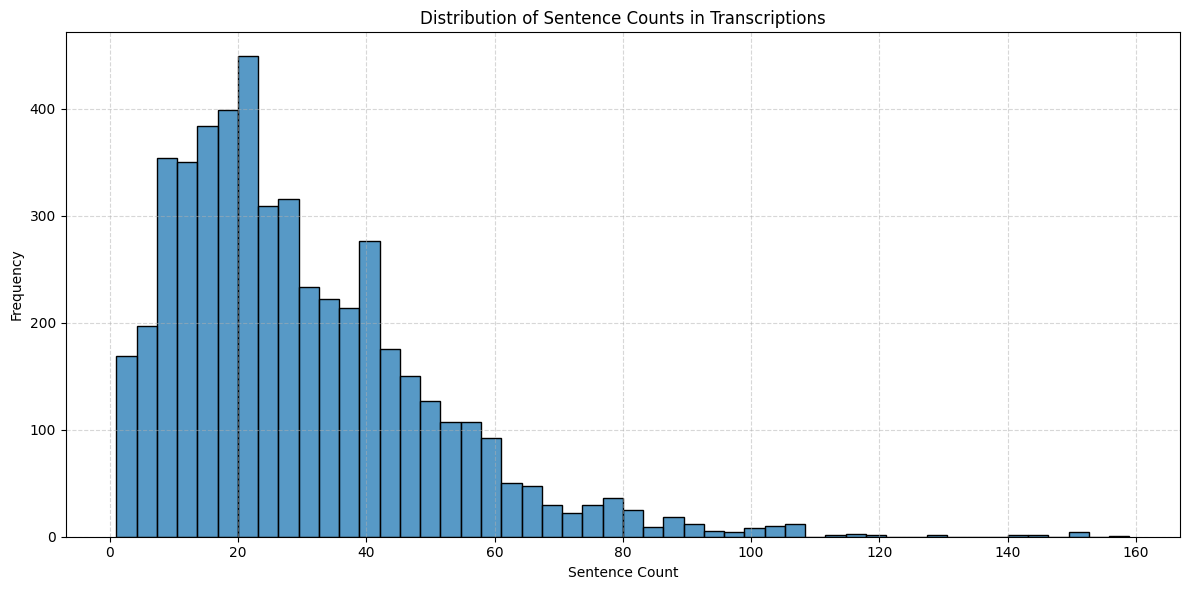

In [67]:
plt.figure(figsize=(12, 6))
sns.histplot(df['sentence_count'], bins=50, kde=False)
plt.title('Distribution of Sentence Counts in Transcriptions')
plt.xlabel('Sentence Count')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [63]:
## Words Per Sentence
fig3 = px.histogram(df, x='words_per_sentence', nbins=50, title='Words Per Sentence Distribution')
fig3.update_layout(bargap=0.1)
fig3.show()

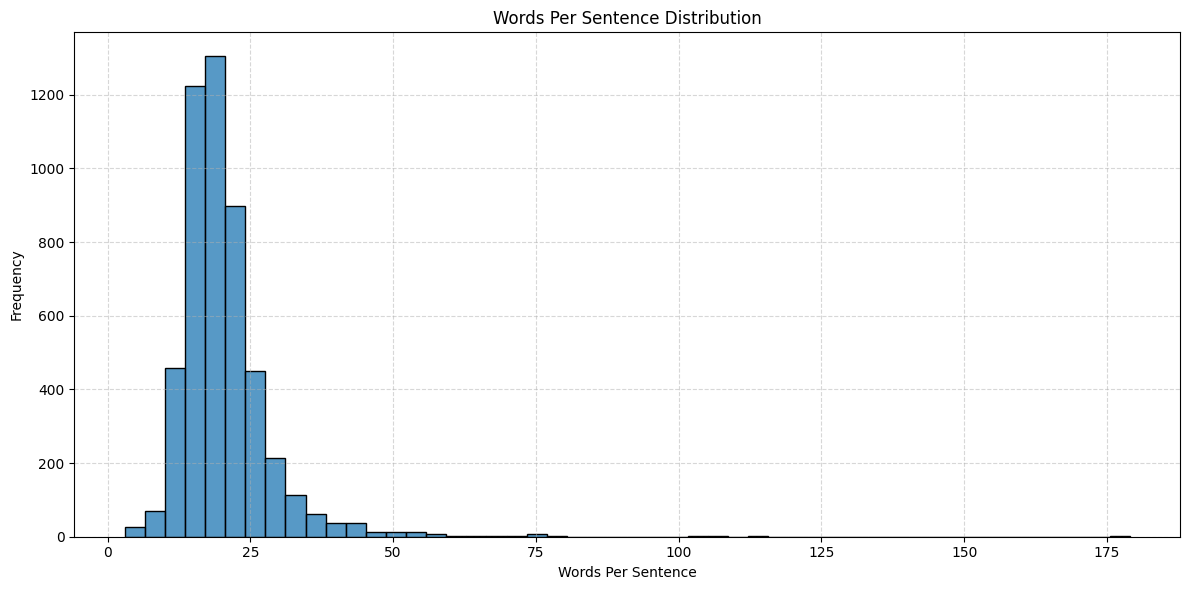

In [68]:
plt.figure(figsize=(12, 6))
sns.histplot(df['words_per_sentence'], bins=50, kde=False)
plt.title('Words Per Sentence Distribution')
plt.xlabel('Words Per Sentence')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [69]:
## Character Count vs Word Count
fig4 = px.scatter(df, x='word_count', y='char_count', trendline='ols',
                  title='Character Count vs Word Count')
fig4.show()

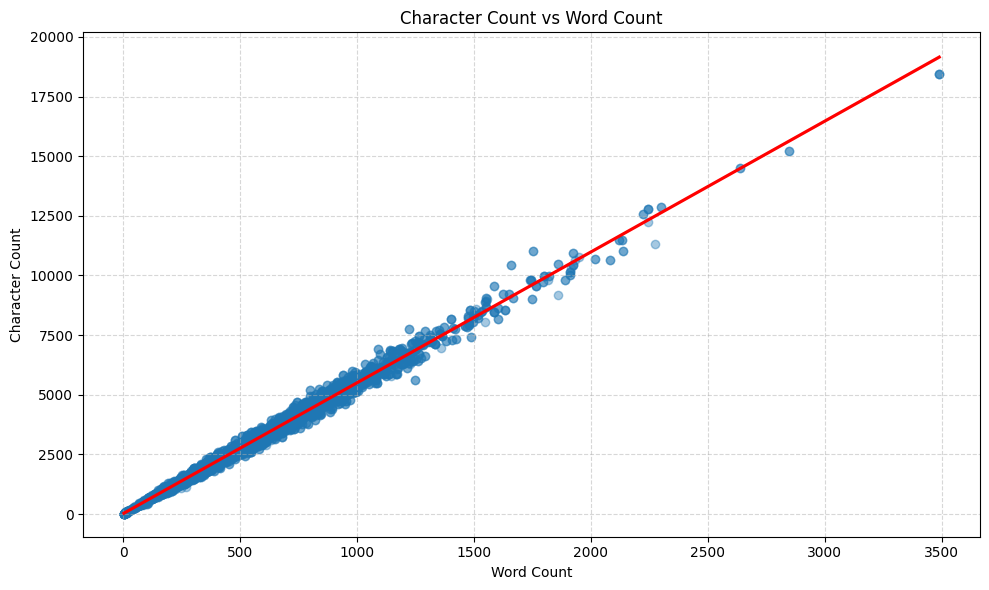

In [70]:
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='word_count', y='char_count', scatter_kws={'alpha': 0.4}, line_kws={'color': 'red'})
plt.title('Character Count vs Word Count')
plt.xlabel('Word Count')
plt.ylabel('Character Count')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [30]:
# Category Distribution (Medical Specialty)
if 'medical_specialty' in df.columns:
    fig5 = px.histogram(df, x='medical_specialty', title='Distribution of Medical Specialties')
    fig5.update_layout(xaxis={'categoryorder':'total descending'})
    fig5.show()

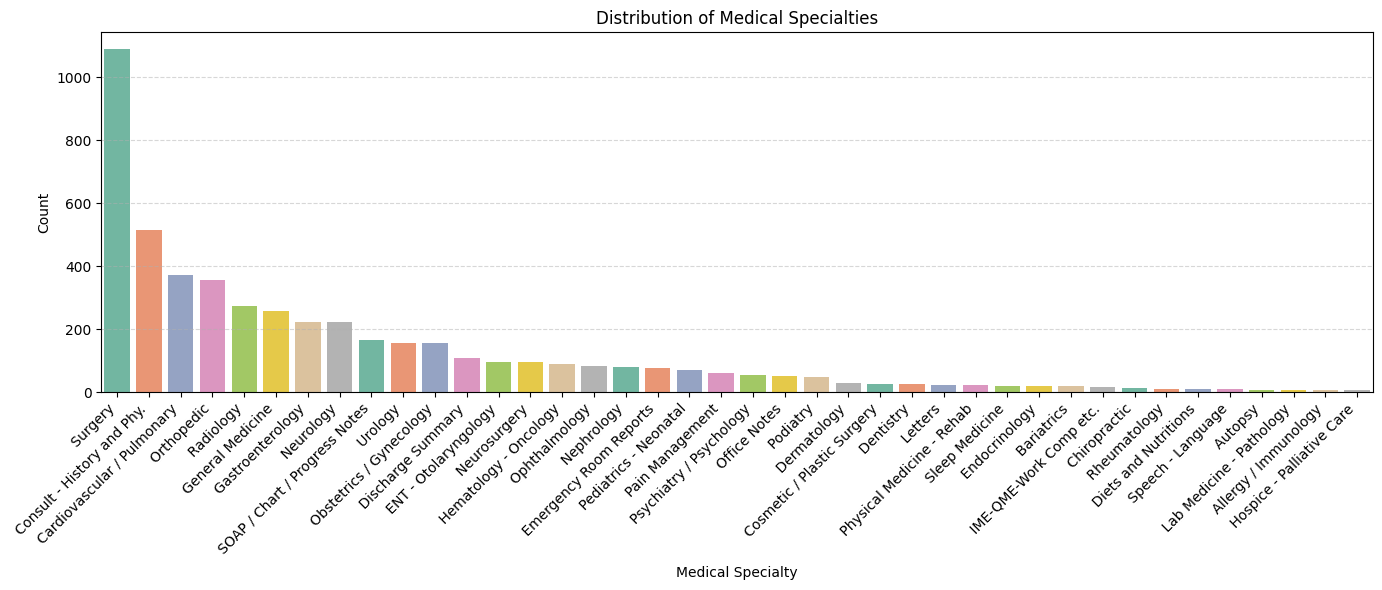

In [71]:
if 'medical_specialty' in df.columns:
    plt.figure(figsize=(14, 6))
    order = df['medical_specialty'].value_counts().index  # Sort by frequency
    sns.countplot(data=df, x='medical_specialty', order=order, palette='Set2')
    plt.title('Distribution of Medical Specialties')
    plt.xlabel('Medical Specialty')
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.show()

In [31]:
# Word Cloud of Transcriptions
all_text = ' '.join(df['transcription'].sample(500, random_state=42))
wordcloud = WordCloud(width=800, height=400, stopwords=STOPWORDS, background_color='white').generate(all_text)

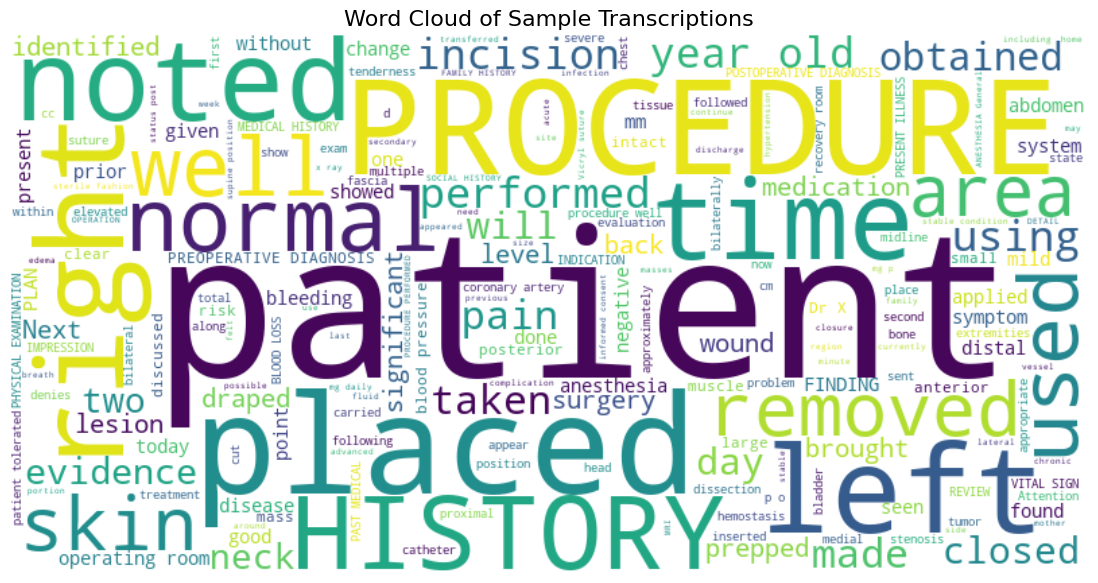

In [32]:
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Sample Transcriptionsa", fontsize=16)
plt.show()

In [33]:
# Most Frequent Words
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PARTHA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [34]:
words = word_tokenize(all_text.lower())
filtered_words = [w for w in words if w.isalpha() and w not in stop_words]
word_freq = Counter(filtered_words)
common_words_df = pd.DataFrame(word_freq.most_common(20), columns=['word', 'frequency'])

In [35]:
fig6 = px.bar(common_words_df, x='word', y='frequency', title='Top 20 Frequent Words in Transcriptions')
fig6.show()

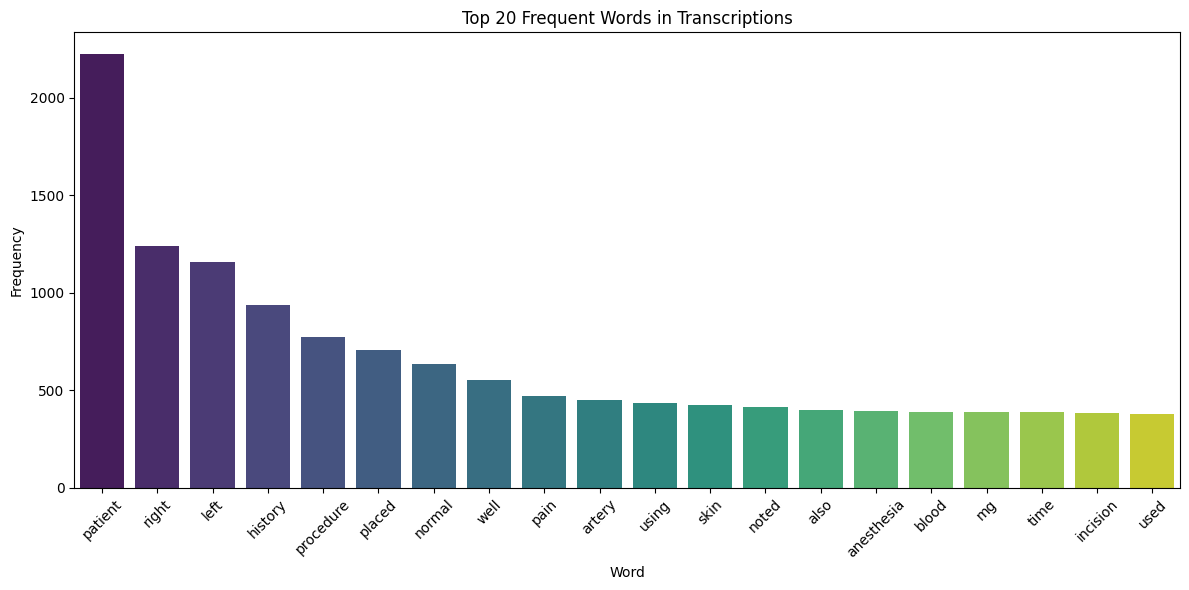

In [72]:
plt.figure(figsize=(12, 6))
sns.barplot(data=common_words_df, x='word', y='frequency', palette='viridis')
plt.title('Top 20 Frequent Words in Transcriptions')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [36]:
# Correlation Heatmap (Plotly)
corr = df[['word_count', 'char_count', 'sentence_count', 'words_per_sentence']].corr()
fig7 = px.imshow(corr, text_auto=True, title='Correlation Heatmap of Textual Features')
fig7.show()

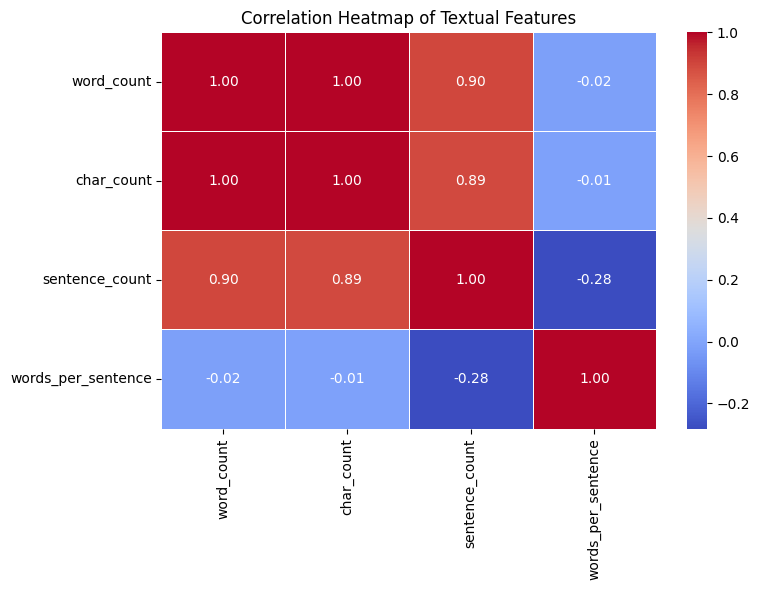

In [73]:
# Compute correlation matrix
corr = df[['word_count', 'char_count', 'sentence_count', 'words_per_sentence']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Textual Features')
plt.tight_layout()
plt.show()

In [37]:
# Feature: Word count per specialty
df['word_count'] = df['transcription'].progress_apply(lambda x: len(word_tokenize(x)))
specialty_word_counts = df.groupby('medical_specialty')['word_count'].mean().reset_index().rename(columns={'word_count': 'avg_word_count'})

  0%|          | 0/4966 [00:00<?, ?it/s]

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [39]:
# TF-IDF Vectorization
specialty_texts = df.groupby('medical_specialty')['transcription'].progress_apply(lambda x: ' '.join(x)).reset_index()
tfidf = TfidfVectorizer(max_features=500)
tfidf_matrix = tfidf.fit_transform(specialty_texts['transcription'])

  0%|          | 0/40 [00:00<?, ?it/s]

In [40]:
# Clustering using KMeans
num_clusters = 6
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(tfidfac_matrix)
specialty_texts['cluster'] = clusters

In [41]:
# Reduce dimensions for visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(tfidf_matrix.toarray())
specialty_texts['pca_1'] = pca_result[:, 0]
specialty_texts['pca_2'] = pca_result[:, 1]

In [42]:
# Merge average word count
specialty_texts = specialty_texts.merge(specialty_word_counts, on='medical_specialty')

In [80]:
# Scatter plot of clusters
fig = px.scatter(specialty_texts, x='pca_1', y='pca_2', color='cluster',
                 size='avg_word_count',
                 hover_data=['medical_specialty', 'avg_word_count'],
                 title='Clustering of Medical Specialties by Vocabulary and Length')
fig.show()

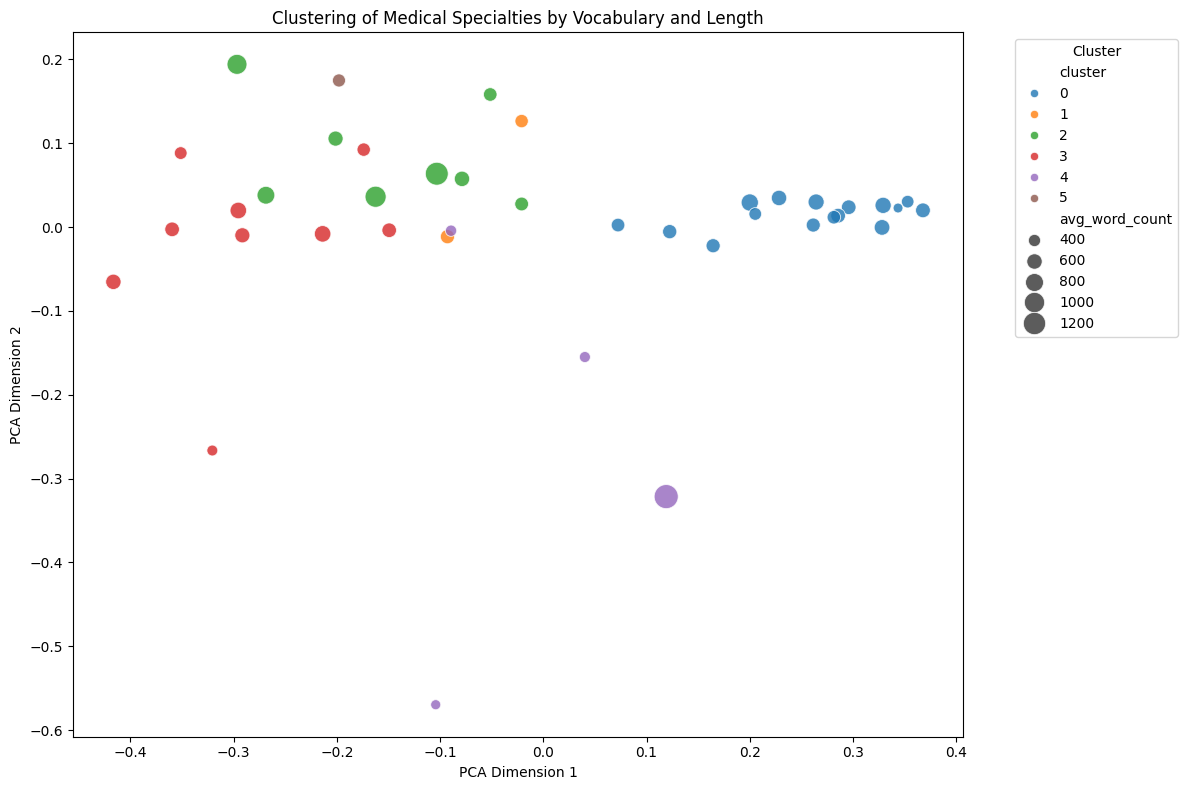

In [77]:
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=specialty_texts,
    x='pca_1',
    y='pca_2',
    hue='cluster',
    size='avg_word_count',
    palette='tab10',
    sizes=(50, 300),
    alpha=0.8
)

plt.title('Clustering of Medical Specialties by Vocabulary and Length')
plt.xlabel('PCA Dimension 1')
plt.ylabel('PCA Dimension 2')

plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [44]:
# Bar plot: Count of specialties per cluster
cluster_counts = specialty_texts['cluster'].value_counts().reset_index()
cluster_counts.columns = ['cluster', 'num_specialties']
fig_bar = px.bar(cluster_counts, x='cluster', y='num_specialties', title='Specialty Counts per Cluster')
fig_bar.show()

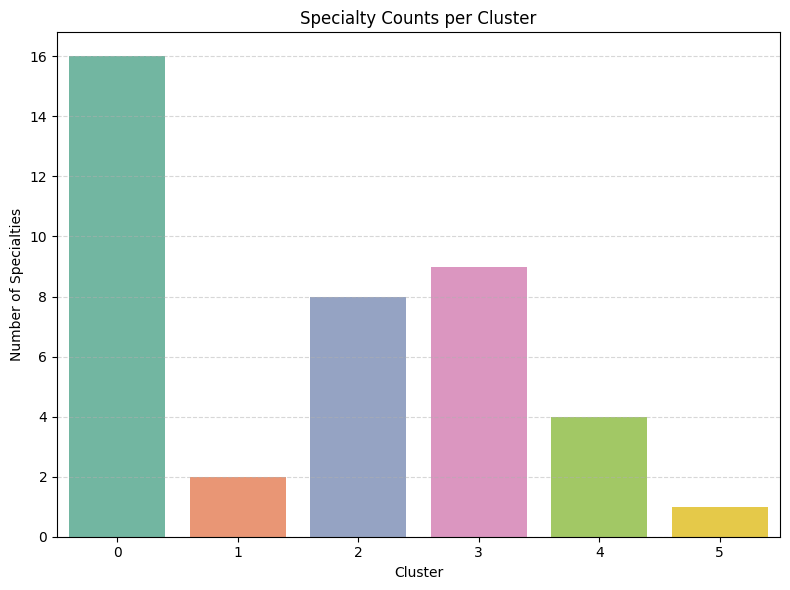

In [75]:
plt.figure(figsize=(8, 6))
sns.barplot(data=cluster_counts.sort_values("cluster"), x='cluster', y='num_specialties', palette='Set2')
plt.title('Specialty Counts per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of Specialties')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [78]:
# Bubble Chart of Specialty Count vs Avg Word Count
bubble_data = specialty_texts.groupby('cluster').agg({
    'avg_word_count': 'mean',
    'medical_specialty': 'count'
}).reset_index().rename(columns={'medical_specialty': 'specialty_count'})

fig = px.scatter(bubble_data, x='cluster', y='avg_word_count', size='specialty_count',
                 title='Bubble Chart: Avg Word Count vs Specialty Count per Cluster',
                 labels={'cluster': 'Cluster','avg_word_count': 'Avg Word Count', 'specialty_count': 'Specialty Count'})
fig.show()

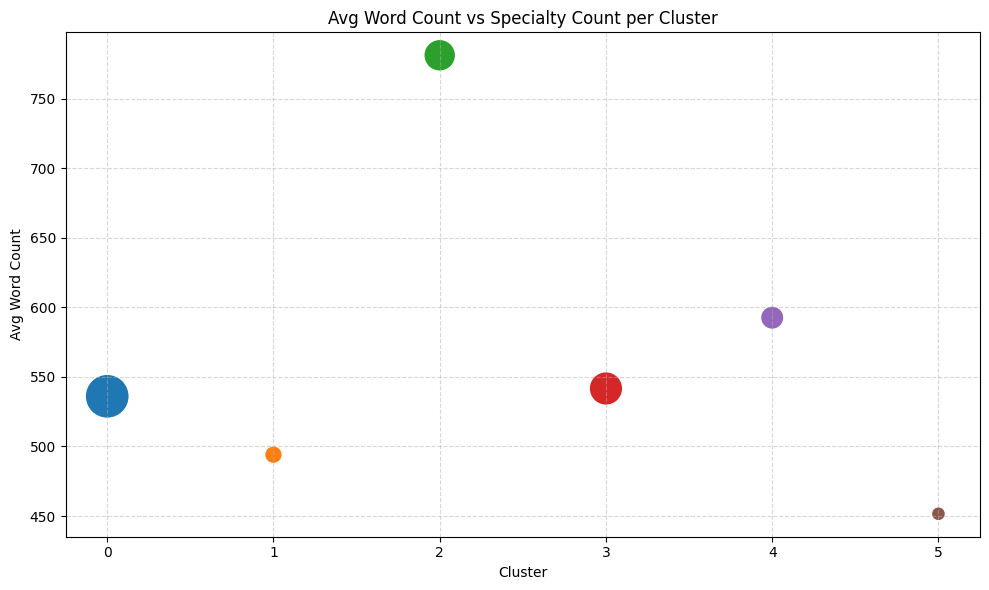

In [76]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=bubble_data,
    x='cluster',
    y='avg_word_count',
    size='specialty_count',
    sizes=(100, 1000),
    hue='cluster',
    palette='tab10',
    legend=False
)
plt.title('Avg Word Count vs Specialty Count per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Avg Word Count')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [46]:
# Label Interpretation: Top Words per Cluster
specialty_texts['transcription'] = specialty_texts['transcription'].astype(str)
tfidf_words = np.array(tfidf.get_feature_names_out())
top_words_per_cluster = {}
for c in tqdm(range(num_clusters)):
    indices = specialty_texts[specialty_texts['cluster'] == c].index
    cluster_matrix = tfidf_matrix[indices].mean(axis=0)
    sorted_indices = np.asarray(cluster_matrix).flatten().argsort()[::-1][:10]
    top_words = tfidf_words[sorted_indices]
    top_words_per_cluster[c] = top_words.tolist()

  0%|          | 0/6 [00:00<?, ?it/s]

In [47]:
for cluster_id, words in top_words_per_cluster.items():
    print(f"\nTop words for Cluster {cluster_id}: {', '.join(words)}")


Top words for Cluster 0: the, was, and, of, to, with, in, patient, were, is

Top words for Cluster 1: the, and, to, patient, of, with, is, in, she, was

Top words for Cluster 2: the, and, of, to, he, was, is, in, with, she

Top words for Cluster 3: the, and, of, is, to, no, she, with, in, was

Top words for Cluster 4: the, of, and, is, with, to, in, right, was, no

Top words for Cluster 5: the, to, of, her, she, and, is, was, at, for


  0%|          | 0/6 [00:00<?, ?it/s]

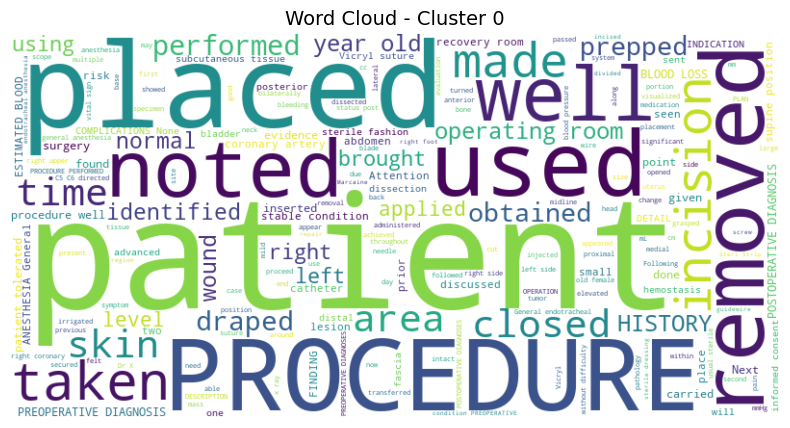

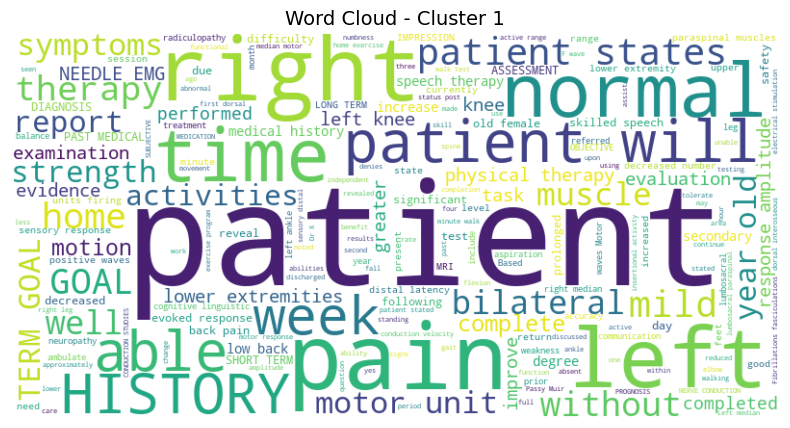

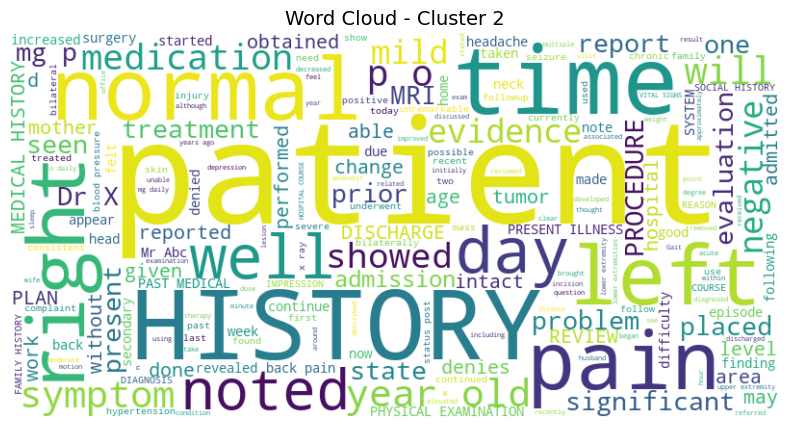

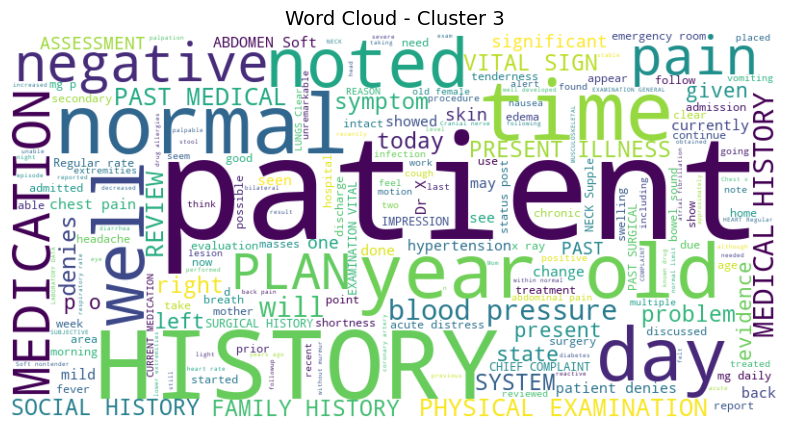

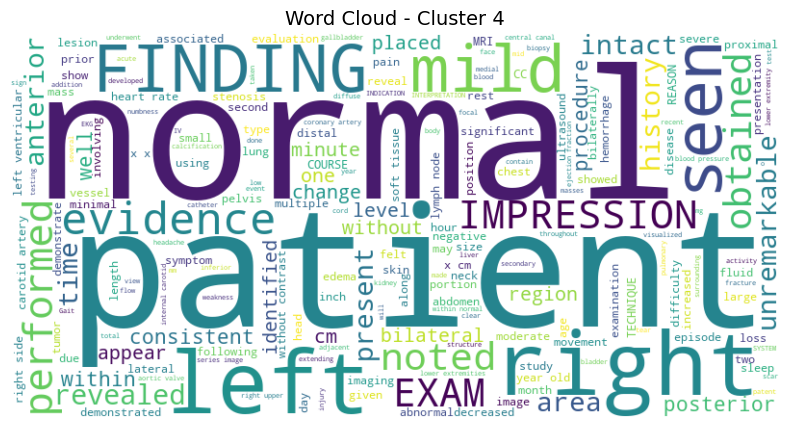

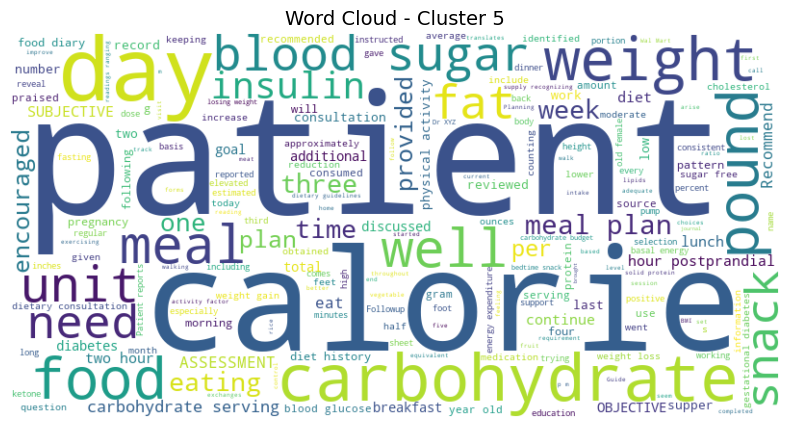

In [48]:
# Word Clouds per Cluster
for c in tqdm(range(num_clusters)):
    text = ' '.join(specialty_texts[specialty_texts['cluster'] == c]['transcription'])
    wordcloud = WordCloud(width=800, height=400, stopwords=STOPWORDS, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Word Cloud - Cluster {c}", fontsize=14)
    plt.show()